<a href="https://colab.research.google.com/github/zz3000/Zz/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **a. Load dataset and Pre-Processing**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.formula.api as smf
from scipy.stats import t
import math
from numpy import log as ln

sns.set(font_scale=1.5)
sns.set_style("whitegrid", {'grid.linestyle':'--'})

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

import os
os.chdir('/content/gdrive/MyDrive/project')

Mounted at /content/gdrive


In [ ]:
import numpy as np
import pandas as pd

In [ ]:
numpy_array = np.load('INPUT_DATA_26.npy')
df = pd.DataFrame(numpy_array, columns =['CRATE','VFRAC_AM_PERCENT','DIFF_C_BULK','RXNK','CONDUCTIVITY','DIFF_BULK','LENGTH','PERCENT_ACTIVE'])
df

,CRATE,VFRAC_AM_PERCENT,DIFF_C_BULK,RXNK,CONDUCTIVITY,DIFF_BULK,LENGTH,PERCENT_ACTIVE
0,6.015625,-6.447266,-11.580078,1.661523,0.794824,0.923828,-5.807617,76.416016
1,3.411133,-6.278442,-11.096069,2.843616,0.761969,0.970581,-5.737976,105.282593
2,4.134766,-6.104248,-11.348877,2.702222,0.673401,0.867432,-5.642700,64.935303
3,16.304688,-6.782227,-11.225586,1.413965,0.944189,0.974023,-5.503418,72.680664
4,3.434570,-6.974731,-11.405640,1.369690,0.622858,0.985620,-5.930847,237.777710
...,...,...,...,...,...,...,...,...
1082,7.140625,-6.869141,-11.876953,1.234961,0.811230,0.820703,-5.659180,86.962891
1083,17.192383,-6.907349,-11.404663,0.756506,0.607477,0.904175,-5.861023,79.794312
1084,19.574219,-6.834473,-11.561035,0.753174,0.914624,0.851855,-5.572510,70.812988
1085,3.431641,-6.375732,-11.835205,3.441089,0.665881,0.874854,-5.567505,161.175537


In [ ]:
from sklearn.preprocessing import StandardScaler

col = df.columns
scaler = StandardScaler()
df = scaler.fit_transform(df.to_numpy())
df = pd.DataFrame(df, columns=col)
df

,CRATE,VFRAC_AM_PERCENT,DIFF_C_BULK,RXNK,CONDUCTIVITY,DIFF_BULK,LENGTH,PERCENT_ACTIVE
0,-0.899964,0.393276,-0.499430,-0.284170,0.220248,0.384188,-0.490997,-0.834017
1,-1.273162,1.001905,1.267050,0.781958,-0.104334,1.197442,-0.006351,-0.384751
2,-1.169473,1.629897,0.344382,0.654435,-0.979315,-0.596812,0.656692,-1.012697
3,0.574358,-0.814300,0.794355,-0.507443,1.695855,1.257321,1.625983,-0.892152
4,-1.269804,-1.508304,0.137216,-0.547374,-1.478640,1.459042,-1.348578,1.677341
...,...,...,...,...,...,...,...,...
1082,-0.738762,-1.127636,-1.582930,-0.668886,0.382329,-1.409641,0.542008,-0.669870
1083,0.701556,-1.265380,0.140780,-1.100404,-1.630591,0.042325,-0.862658,-0.781438
1084,1.042850,-1.002653,-0.429929,-1.103410,1.403772,-0.867755,1.145160,-0.921219
1085,-1.270224,0.651162,-1.430563,1.320819,-1.053602,-0.467711,1.179990,0.485141


In [ ]:
# from sklearn.preprocessing import Normalizer

# col  = df.columns
# normal = Normalizer()
# df = normal.fit_transform(df.to_numpy())
# df = pd.DataFrame(df, columns=col)
# df

In [ ]:
numpy_array2 = np.load('TARGET_DATA_26.npy')
df2 = pd.DataFrame(numpy_array2, columns =['Energy'])
df2

,Energy
0,130.816863
1,116.209778
2,141.348747
3,138.131396
4,113.485237
...,...
1082,133.267138
1083,98.435479
1084,144.234427
1085,77.264326


In [ ]:
from sklearn.preprocessing import StandardScaler

col2 = df2.columns
scaler = StandardScaler()
df2 = scaler.fit_transform(df2.to_numpy())
df2 = pd.DataFrame(df2, columns=col2)
df2

,Energy
0,0.887320
1,0.574668
2,1.112747
3,1.043882
4,0.516351
...,...
1082,0.939766
1083,0.194223
1084,1.174512
1085,-0.258928


In [ ]:
# col = df2.columns

# df2 = scaler.fit_transform(df2.to_numpy())
# df2 = pd.DataFrame(df2, columns=col)
# df2

In [ ]:
data = pd.concat([df, df2], axis=1, join='inner')
display(data)

,CRATE,VFRAC_AM_PERCENT,DIFF_C_BULK,RXNK,CONDUCTIVITY,DIFF_BULK,LENGTH,PERCENT_ACTIVE,Energy
0,-0.899964,0.393276,-0.499430,-0.284170,0.220248,0.384188,-0.490997,-0.834017,0.887320
1,-1.273162,1.001905,1.267050,0.781958,-0.104334,1.197442,-0.006351,-0.384751,0.574668
2,-1.169473,1.629897,0.344382,0.654435,-0.979315,-0.596812,0.656692,-1.012697,1.112747
3,0.574358,-0.814300,0.794355,-0.507443,1.695855,1.257321,1.625983,-0.892152,1.043882
4,-1.269804,-1.508304,0.137216,-0.547374,-1.478640,1.459042,-1.348578,1.677341,0.516351
...,...,...,...,...,...,...,...,...,...
1082,-0.738762,-1.127636,-1.582930,-0.668886,0.382329,-1.409641,0.542008,-0.669870,0.939766
1083,0.701556,-1.265380,0.140780,-1.100404,-1.630591,0.042325,-0.862658,-0.781438,0.194223
1084,1.042850,-1.002653,-0.429929,-1.103410,1.403772,-0.867755,1.145160,-0.921219,1.174512
1085,-1.270224,0.651162,-1.430563,1.320819,-1.053602,-0.467711,1.179990,0.485141,-0.258928


## **b. Reading and Understanding the Data**


In [ ]:
data.shape

(1087, 9)

In [ ]:
pd.isnull(data).any()

CRATE               False
VFRAC_AM_PERCENT    False
DIFF_C_BULK         False
RXNK                False
CONDUCTIVITY        False
DIFF_BULK           False
LENGTH              False
PERCENT_ACTIVE      False
Energy              False
dtype: bool

In [ ]:
data.describe()

,CRATE,VFRAC_AM_PERCENT,DIFF_C_BULK,RXNK,CONDUCTIVITY,DIFF_BULK,LENGTH,PERCENT_ACTIVE,Energy
count,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03,1.087000e+03
mean,1.307346e-17,1.608036e-15,2.732354e-15,-1.715892e-16,1.274663e-16,1.034438e-15,1.003388e-15,-1.634183e-16,3.268366e-18
std,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00,1.000460e+00
min,-1.616975e+00,-1.597640e+00,-2.026221e+00,-1.691648e+00,-1.701501e+00,-1.768492e+00,-1.828127e+00,-1.632521e+00,-1.885877e+00
25%,-8.663803e-01,-8.345433e-01,-8.279998e-01,-8.402052e-01,-8.571215e-01,-8.528915e-01,-8.452431e-01,-8.763356e-01,-8.973270e-01
50%,-4.777906e-02,-6.968667e-02,1.269686e-01,-8.084183e-03,-6.001556e-02,5.377786e-03,3.417969e-03,-7.697595e-02,2.826905e-02
75%,8.090236e-01,7.757044e-01,8.671972e-01,8.532340e-01,8.575954e-01,8.683185e-01,8.826614e-01,8.390816e-01,9.729592e-01
max,1.815273e+00,2.002203e+00,1.616782e+00,1.814596e+00,1.752836e+00,1.707477e+00,1.646371e+00,1.863288e+00,1.541089e+00


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CRATE             1087 non-null   float64
 1   VFRAC_AM_PERCENT  1087 non-null   float64
 2   DIFF_C_BULK       1087 non-null   float64
 3   RXNK              1087 non-null   float64
 4   CONDUCTIVITY      1087 non-null   float64
 5   DIFF_BULK         1087 non-null   float64
 6   LENGTH            1087 non-null   float64
 7   PERCENT_ACTIVE    1087 non-null   float64
 8   Energy            1087 non-null   float64
dtypes: float64(9)
memory usage: 76.6 KB


## **c. Visualizing the data**

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


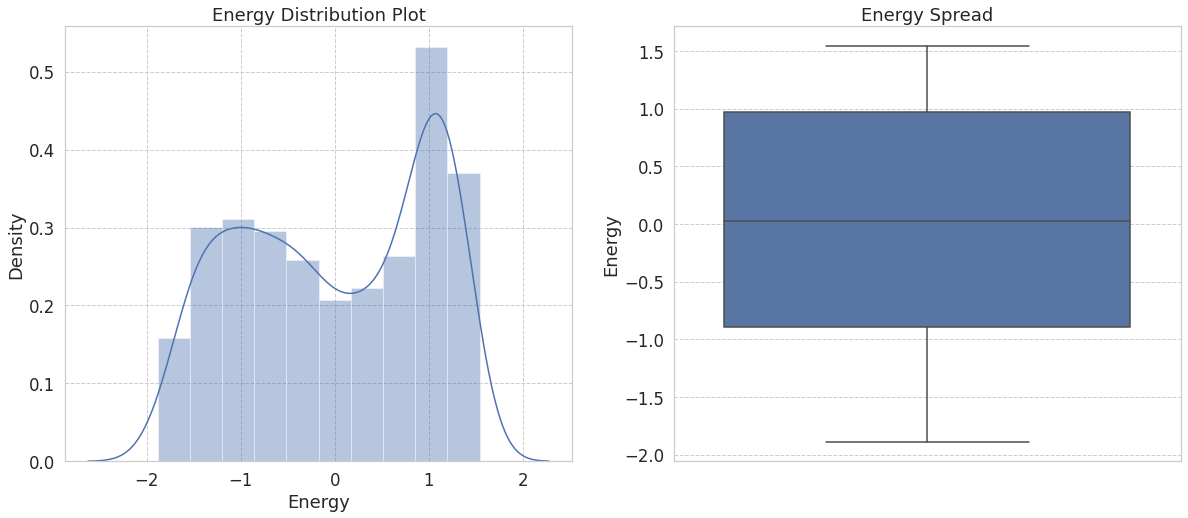

In [ ]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Energy Distribution Plot')
sns.distplot(data.Energy)

plt.subplot(1,2,2)
plt.title('Energy Spread')
sns.boxplot(y=data.Energy)

plt.show()

In [ ]:
print(data.Energy.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    1.087000e+03
mean     3.268366e-18
std      1.000460e+00
min     -1.885877e+00
25%     -8.973270e-01
50%      2.826905e-02
75%      9.729592e-01
85%      1.156546e+00
90%      1.239105e+00
100%     1.541089e+00
max      1.541089e+00
Name: Energy, dtype: float64


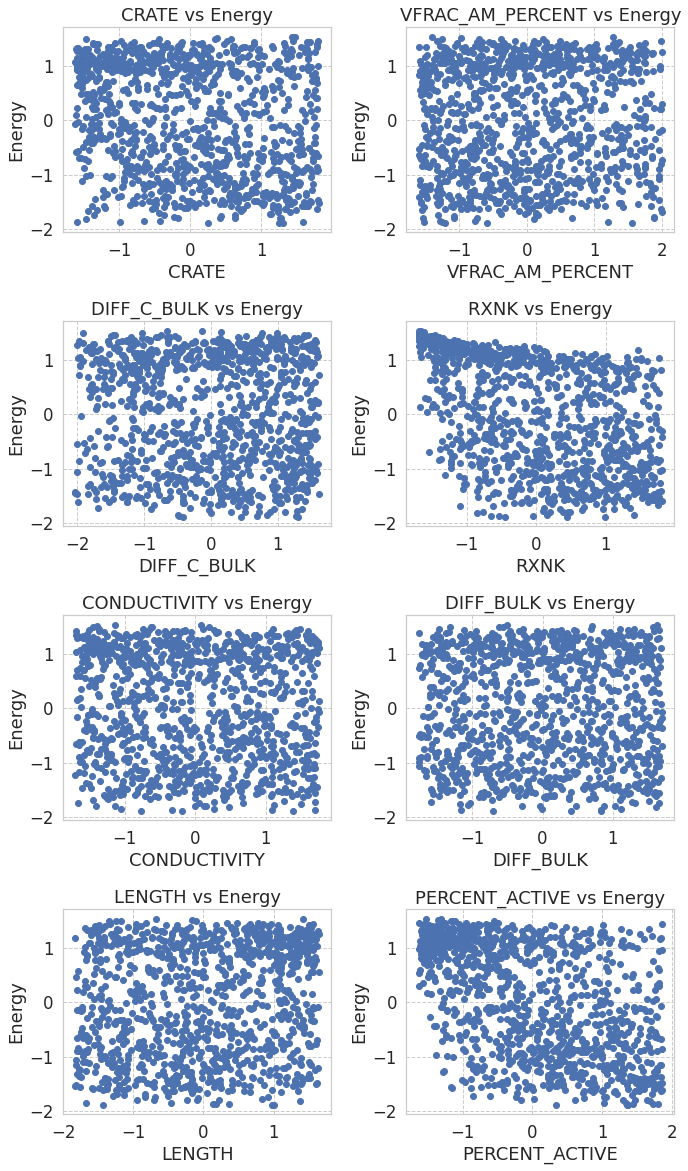

In [ ]:
def scatter(x,fig):
    plt.subplot(5,2,fig)
    plt.scatter(data[x],data['Energy'])
    plt.title(x+' vs Energy')
    plt.ylabel('Energy')
    plt.xlabel(x)

plt.figure(figsize=(10,20))

scatter('CRATE', 1)
scatter('VFRAC_AM_PERCENT', 2)
scatter('DIFF_C_BULK', 3)
scatter('RXNK', 4)
scatter('CONDUCTIVITY', 5)
scatter('DIFF_BULK', 6)
scatter('LENGTH', 7)
scatter('PERCENT_ACTIVE', 8)

plt.tight_layout()

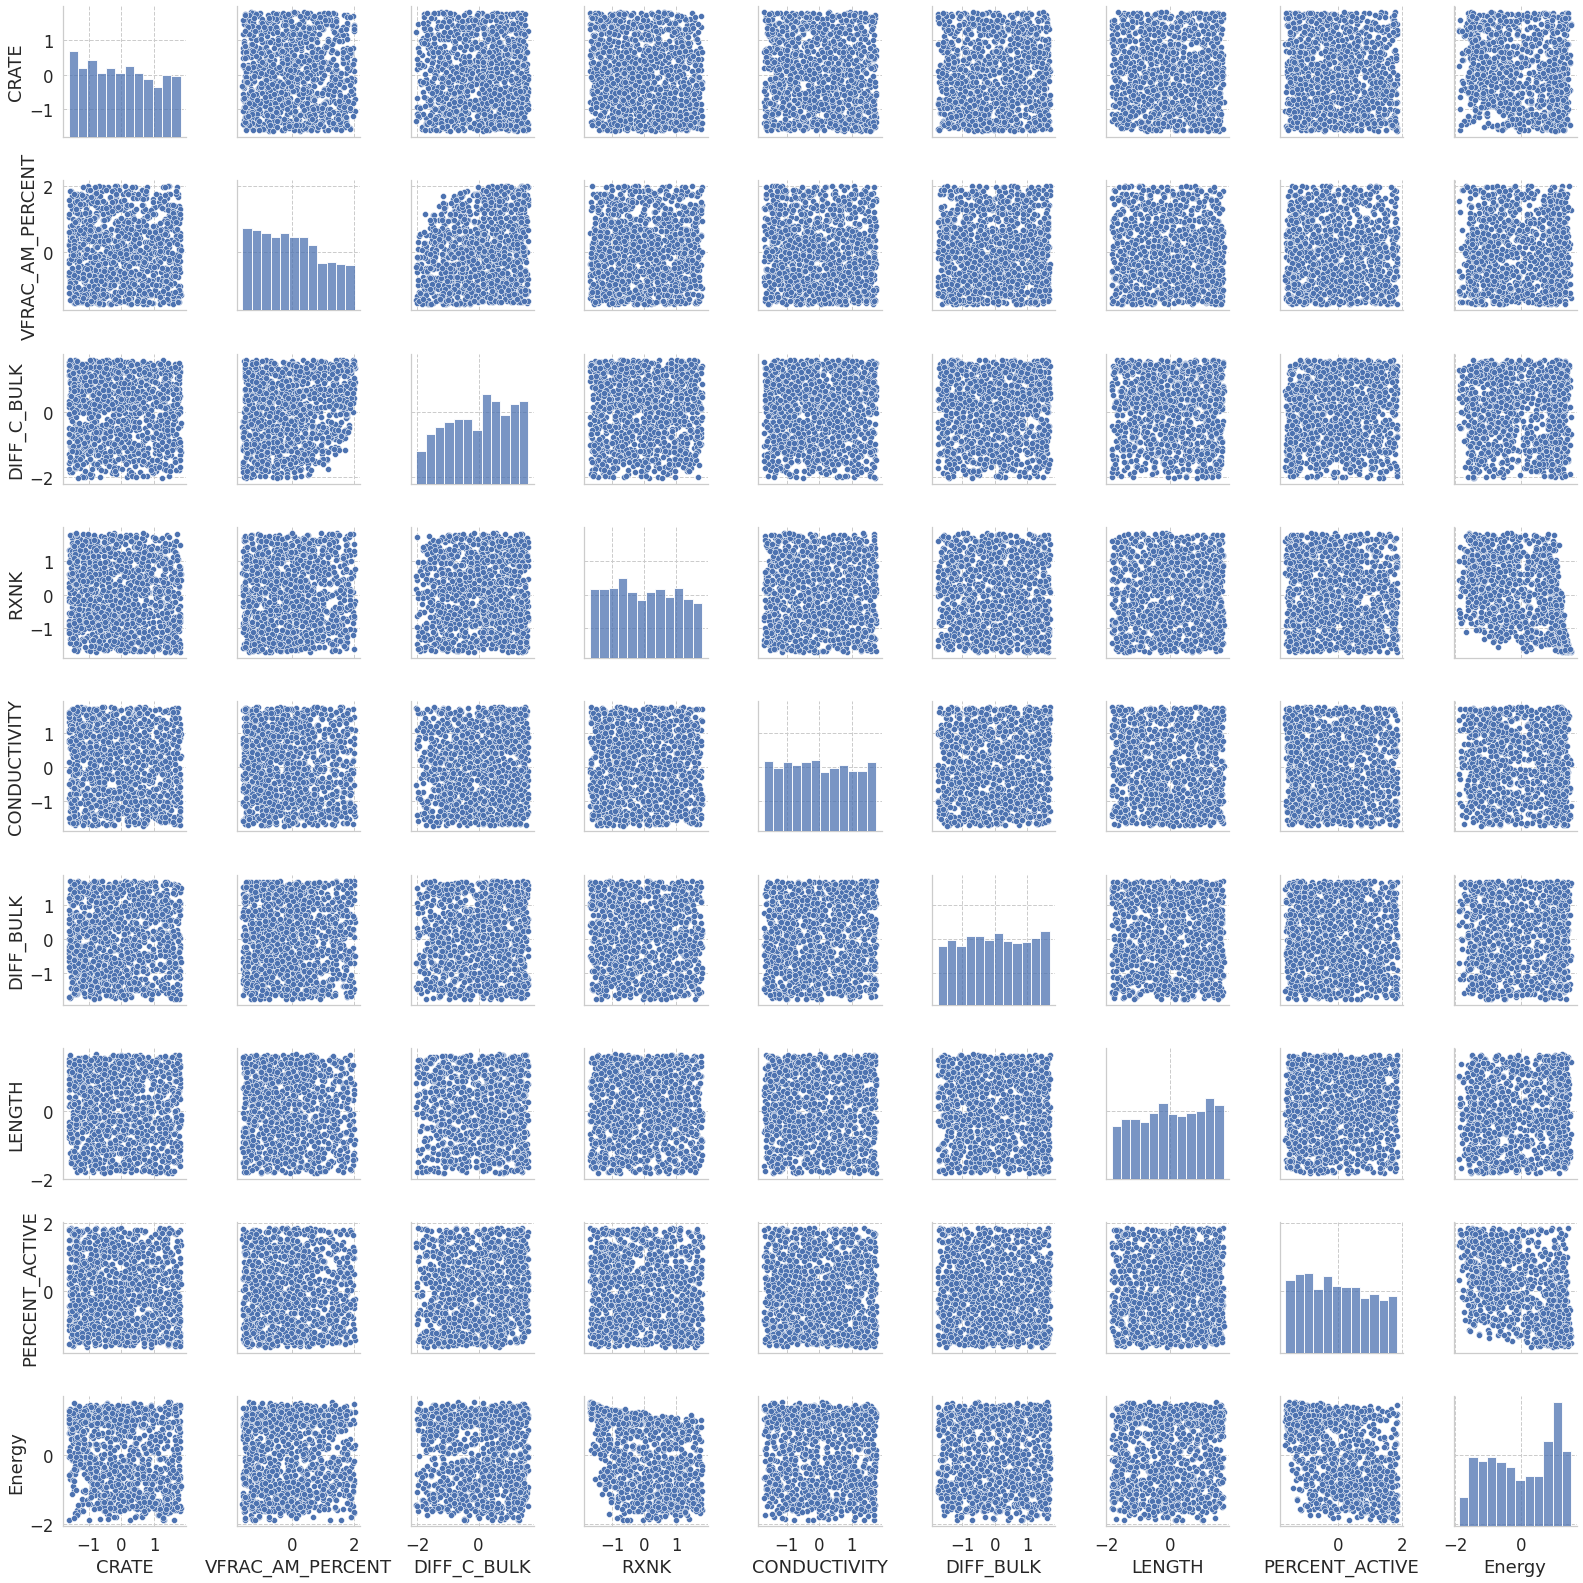

In [ ]:
sns.pairplot(data)
plt.show()

In [ ]:
data[['CRATE' , 'VFRAC_AM_PERCENT' ,  'DIFF_C_BULK' , 'RXNK' ,  'CONDUCTIVITY' , 'DIFF_BULK' , 'LENGTH' , 'PERCENT_ACTIVE']].corr()

,CRATE,VFRAC_AM_PERCENT,DIFF_C_BULK,RXNK,CONDUCTIVITY,DIFF_BULK,LENGTH,PERCENT_ACTIVE
CRATE,1.000000,-0.026414,-0.004225,-0.088105,-0.076934,0.026415,0.000278,-0.086903
VFRAC_AM_PERCENT,-0.026414,1.000000,0.207040,0.043736,-0.006146,0.007298,-0.028211,-0.050700
DIFF_C_BULK,-0.004225,0.207040,1.000000,0.028333,0.005272,0.015565,-0.044451,0.094659
RXNK,-0.088105,0.043736,0.028333,1.000000,-0.001755,-0.026931,0.018544,-0.083173
CONDUCTIVITY,-0.076934,-0.006146,0.005272,-0.001755,1.000000,0.022442,0.008722,0.000434
DIFF_BULK,0.026415,0.007298,0.015565,-0.026931,0.022442,1.000000,-0.016703,-0.030407
LENGTH,0.000278,-0.028211,-0.044451,0.018544,0.008722,-0.016703,1.000000,0.034499
PERCENT_ACTIVE,-0.086903,-0.050700,0.094659,-0.083173,0.000434,-0.030407,0.034499,1.000000


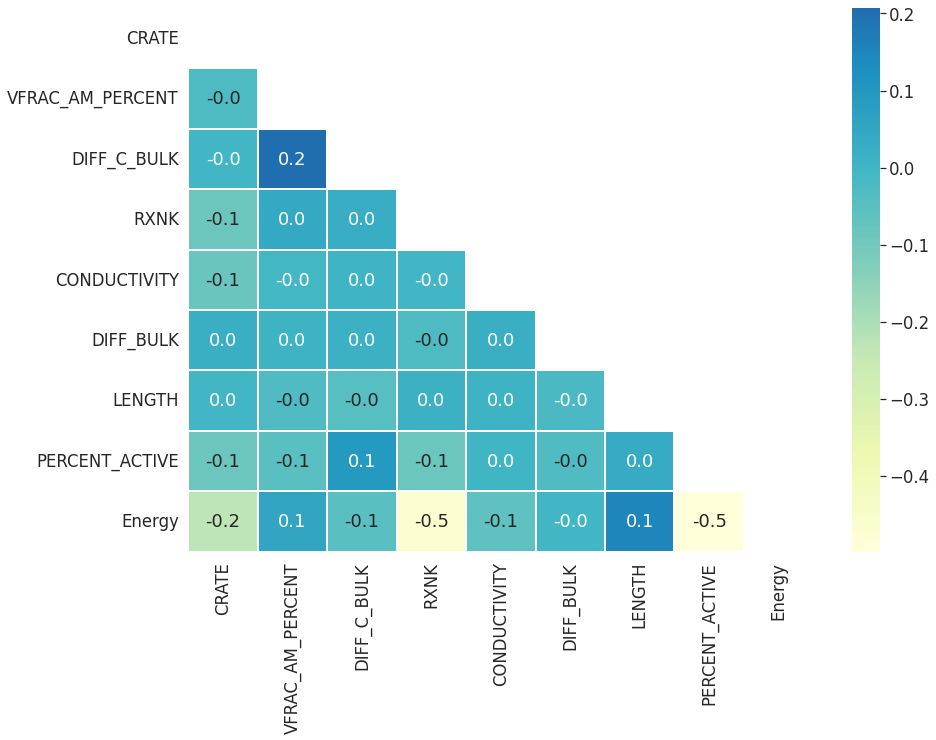

In [ ]:
plt.figure(figsize=(14,10))
# Create the correlation matrix
corr = data.corr()
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
sns.heatmap(corr, mask=mask, cmap='YlGnBu', center=0, linewidths=1, annot=True, fmt=".1f")
plt.show()

## **d. Modelling**

In [ ]:
from sklearn.model_selection import train_test_split

y = data.Energy
X = data.drop('Energy', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

### **1. Parametric Form of regression**

#### **1.1 OLS**

In [ ]:
model_1 = smf.ols(formula='Energy ~ CRATE + VFRAC_AM_PERCENT + DIFF_C_BULK + RXNK + CONDUCTIVITY + DIFF_BULK + LENGTH + PERCENT_ACTIVE', data = data)
result = model_1.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                 Energy   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     264.0
Date:                Thu, 15 Dec 2022   Prob (F-statistic):          8.70e-248
Time:                        21:11:42   Log-Likelihood:                -952.77
No. Observations:                1087   AIC:                             1924.
Df Residuals:                    1078   BIC:                             1968.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept        -1.431e-17      0.018  

In [ ]:
X_test.shape

(218, 8)

0.6418903900459576

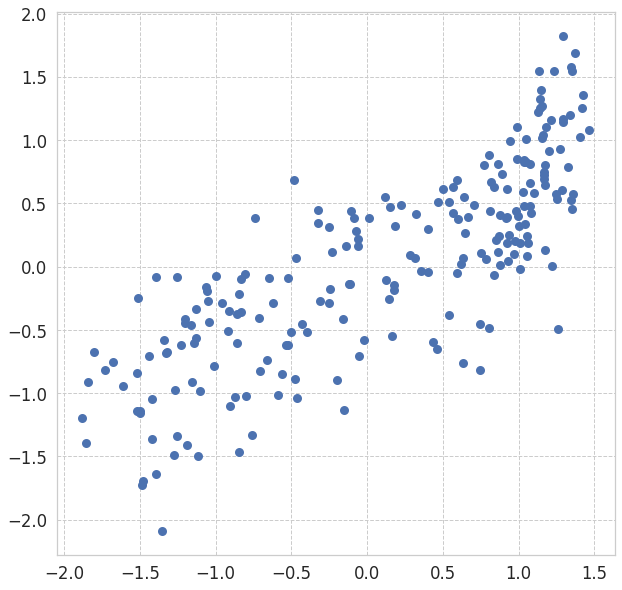

In [ ]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import metrics

plt
linear = LinearRegression().fit(X_train, y_train)
linear_pred = linear.predict(X_test)

plt.figure(figsize=(10,10))
plt.scatter(y_test, linear_pred, linewidth=3)

r2_linear = metrics.r2_score(y_test, linear_pred)
r2_linear

#### **1.2 Lasso**

In [ ]:
from sklearn.linear_model import Lasso

model_2 = Lasso()
lasso = model_2.fit(X_train, y_train)
lasso_pred = lasso.predict(X_test)

r2_lasso = metrics.r2_score(y_test, lasso_pred)
r2_lasso

-0.02016328931115252

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print("The Accuracy before tunning is: %.2f%%" % (r2_lasso * 100.0))

model_2 = Lasso()
params = model_2.get_params()
#print(params)

#Setting the hyperparameters for testing
new_params = {'alpha': np.arange(0.01, 1.0, 0.01)}

optim = GridSearchCV(estimator = Lasso(),
                     param_grid = new_params,
                     scoring = 'neg_mean_squared_error',
                     cv = KFold(5))
result = optim.fit(X_train, y_train)

# make predictions for test data
ypred = result.predict(X_test)

# evaluate predictions
r2_lasso_optim = metrics.r2_score(y_test, ypred)
print("The Accuracy after optimization is: %.2f%%" % (r2_lasso_optim * 100.0))
print("The best params are:")
print(result.best_params_)

The Accuracy before tunning is: -2.02%
The Accuracy after optimization is: 63.98%
The best params are:
{'alpha': 0.01}


#### **1.3 Ridge**

In [ ]:
from sklearn.linear_model import Ridge

model_3 = Ridge()
ridge = model_3.fit(X_train, y_train)
ridge_pred = ridge.predict(X_test)

r2_ridge = metrics.r2_score(y_test, ridge_pred)
r2_ridge

0.641840244606877

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print("The Accuracy before tunning is: %.2f%%" % (r2_ridge * 100.0))

model_3 = Ridge()
params = model_3.get_params()
#print(params)

#Setting the hyperparameters for testing
new_params = {'alpha': np.arange(0.5, 50, 0.5)}

optim = GridSearchCV(estimator = Ridge(),
                     param_grid = new_params,
                     scoring = 'neg_mean_squared_error',
                     cv = KFold(5))
result = optim.fit(X_train, y_train)

# make predictions for test data
ypred = result.predict(X_test)

# evaluate predictions
r2_ridge_optim = metrics.r2_score(y_test, ypred)
print("The Accuracy after optimization is: %.2f%%" % (r2_ridge_optim * 100.0))
print("The best params are:")
print(result.best_params_)

The Accuracy before tunning is: 64.18%
The Accuracy after optimization is: 64.19%
The best params are:
{'alpha': 0.5}


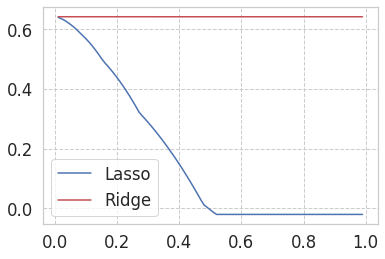

In [ ]:
r2_lasso_optim = []
r2_ridge_optim = []
for a in np.arange(0.01, 1, 0.01):
  lasso = Lasso(alpha=a)
  ridge = Ridge(alpha=a)
  ylasso = lasso.fit(X_train, y_train).predict(X_test)
  yridge = ridge.fit(X_train, y_train).predict(X_test)
  r2_lasso_optim.append(metrics.r2_score(y_test, ylasso))
  r2_ridge_optim.append(metrics.r2_score(y_test, yridge))

plt.plot(np.arange(0.01, 1, 0.01), r2_lasso_optim, 'b', label='Lasso')
plt.plot(np.arange(0.01, 1, 0.01), r2_ridge_optim, 'r', label='Ridge')
plt.legend()
plt.show();

#### **1.4 Lasso with PolinomialFeatures**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe1 = Pipeline([('poly', PolynomialFeatures()),('fit', Lasso())])

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("The Accuracy before tunning is: %.2f%%" % (r2_lasso * 100.0))

    model_2 = Lasso()

    #Setting the hyperparameters for testing
    lasso_params = {'fit__alpha': np.arange(0.01, 1, 0.01)}

    optim = GridSearchCV(estimator = pipe1,
                        param_grid = lasso_params,
                        scoring = 'neg_mean_squared_error',
                        cv = KFold(5))
    result = optim.fit(X_train, y_train)

    # make predictions for test data
    ypred = result.predict(X_test)

    # evaluate predictions
    r2_lasso_optim = metrics.r2_score(y_test, ypred)
    print("The Accuracy after optimization is: %.2f%%" % (r2_lasso_optim * 100.0))
    print("The best params are:")
    print(result.best_params_)

The Accuracy before tunning is: -2.02%
The Accuracy after optimization is: 71.41%
The best params are:
{'fit__alpha': 0.01}


#### **1.5 Ridge with PolinomialFeatures**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

pipe2 = Pipeline([('poly', PolynomialFeatures()),('fit', Ridge())])

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    print("The Accuracy before tunning is: %.2f%%" % (r2_ridge * 100.0))

    model_3 = Ridge()

    #Setting the hyperparameters for testing
    ridge_params = {'fit__alpha': np.arange(0.01, 1, 0.01)}

    optim = GridSearchCV(estimator = pipe2,
                        param_grid = ridge_params,
                        scoring = 'neg_mean_squared_error',
                        cv = KFold(5))
    result = optim.fit(X_train, y_train)

    # make predictions for test data
    ypred = result.predict(X_test)

    # evaluate predictions
    r2_ridge_optim = metrics.r2_score(y_test, ypred)
    print("The Accuracy after optimization is: %.2f%%" % (r2_ridge_optim * 100.0))
    print("The best params are:")
    print(result.best_params_)

The Accuracy before tunning is: 64.18%
The Accuracy after optimization is: 70.66%
The best params are:
{'fit__alpha': 0.99}


### **2. Non-parametric form of regression**

#### **2.1 Decision Tree**

In [ ]:

# import the regressor
from sklearn.tree import DecisionTreeRegressor 
  
# create a regressor object
regressor = DecisionTreeRegressor(max_depth=10,
                      random_state=123, splitter='best')
  
# fit the regressor with X and Y data
regressor.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10, random_state=123)

In [ ]:
import sklearn 
#y_test = data.iloc[800:,-1]

regressor.score(X_test,y_test)

0.37608150519797845

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
y_pred.shape

(218,)

In [ ]:
# import export_graphviz
from sklearn.tree import export_graphviz 
  
# export the decision tree to a tree.dot file
# for visualizing the plot easily anywhere
export_graphviz(regressor, out_file ='tree.dot')

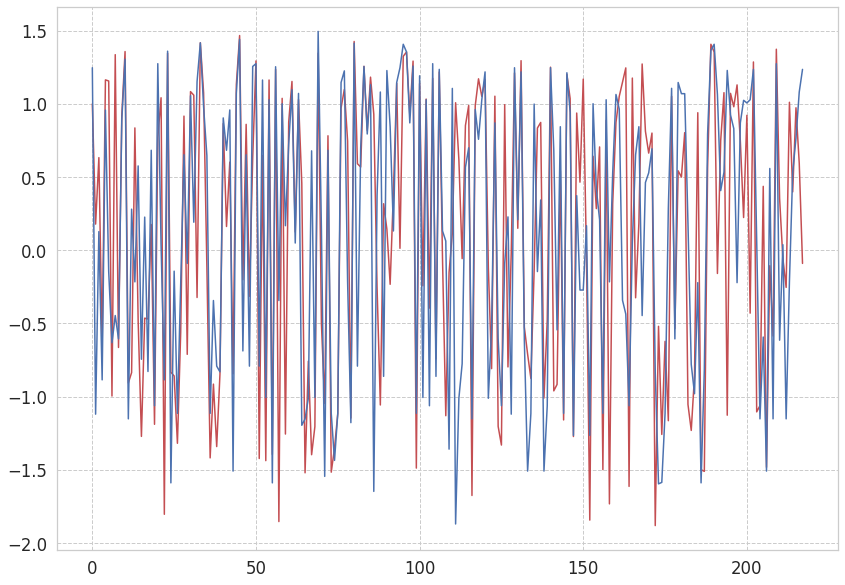

In [ ]:
plt.figure(figsize=(14,10))
plt.plot(range(218), y_test, 'r') # plotting t, a separately 
plt.plot(range(218), y_pred, 'b') # plotting t, b separately 
plt.show()

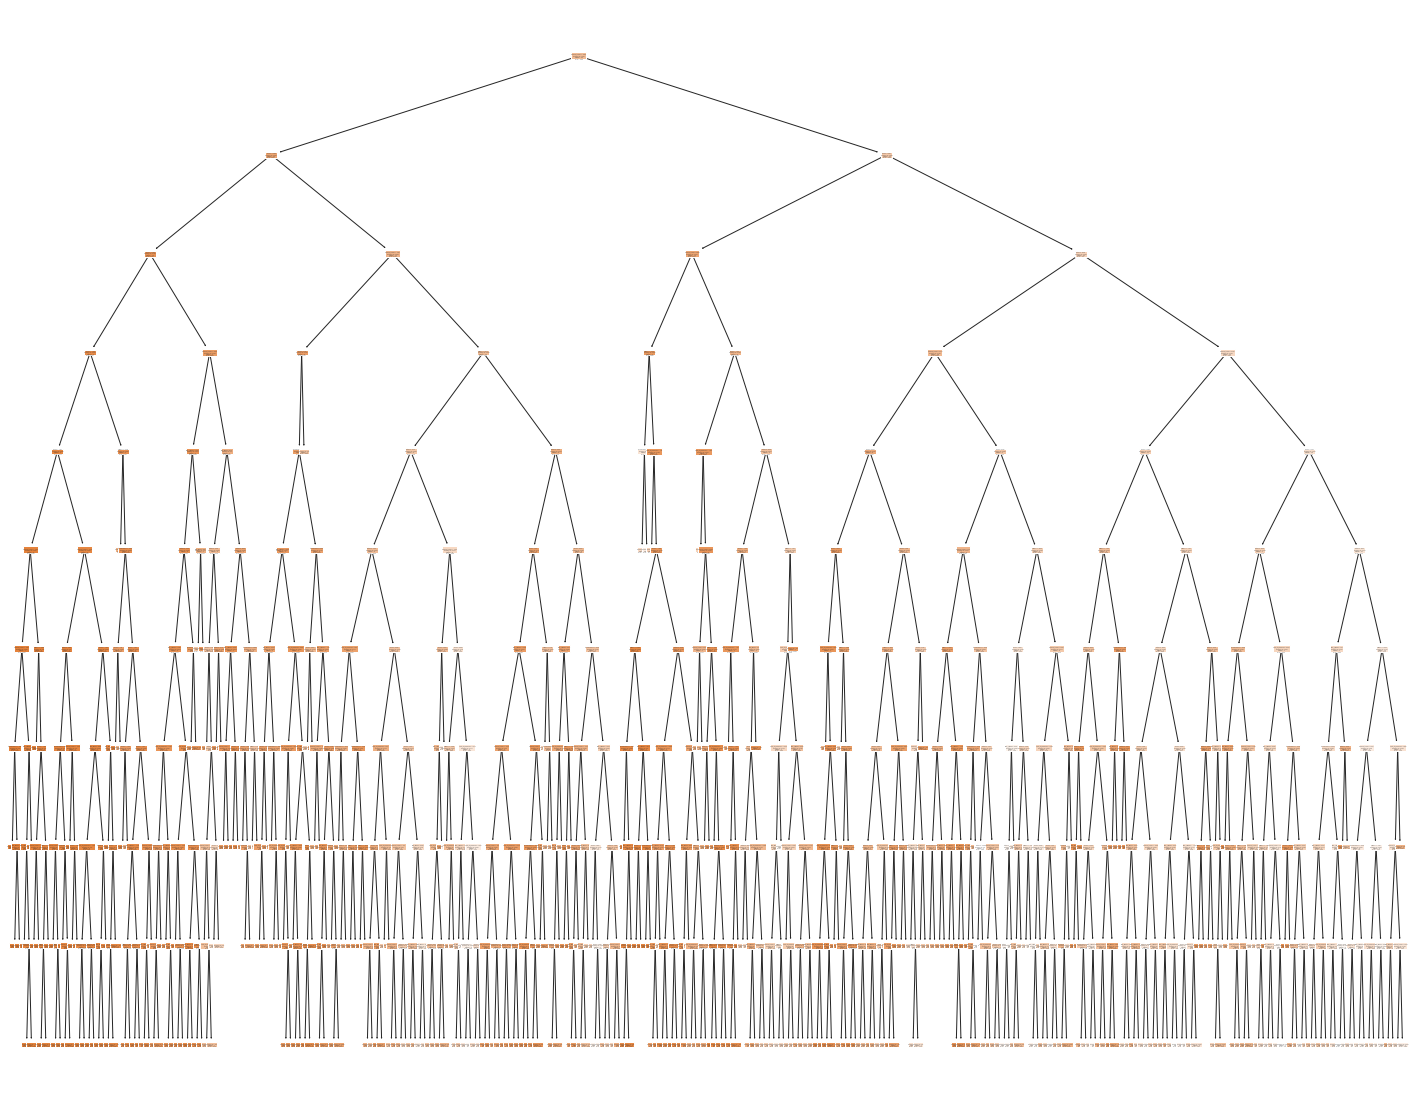

In [ ]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(regressor, 
                   feature_names=['CRATE' , 'VFRAC_AM_PERCENT' ,  'DIFF_C_BULK' , 'RXNK' ,  'CONDUCTIVITY' , 'DIFF_BULK' , 'LENGTH' , 'PERCENT_ACTIVE'],  
                   class_names="Energy",
                   filled=True)

#### **2.2 Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

rfr = model.fit(X_train, y_train)
rfr_pred = rfr.predict(X_test)

r2_rfr = metrics.r2_score(y_test, rfr_pred)
r2_rfr

0.7226732555396465

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print("The Accuracy before tunning is: %.2f%%" % (r2_rfr * 100.0))

model_4 = RandomForestRegressor()
params = model_4.get_params()
#print(params)

n_estimators = [100] # number of trees in the random forest
max_features = ['auto'] # number of features in consideration at every split
max_depth = [int(60)] # maximum number of levels allowed in each decision tree
min_samples_split = [2] # minimum sample number to split a node
min_samples_leaf = [4] # minimum sample number that can be stored in a leaf node
bootstrap = [True, False] # method used to sample data points

random_grid = {'n_estimators': n_estimators, 'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

optim = GridSearchCV(estimator = RandomForestRegressor(),
                     param_grid = random_grid,
                     scoring = 'neg_mean_squared_error',
                     cv = KFold(5))
result = optim.fit(X_train, y_train)

# make predictions for test data
ypred = result.predict(X_test)

# evaluate predictions
r2_rfr_optim = metrics.r2_score(y_test, ypred)
print("The Accuracy after optimization is: %.2f%%" % (r2_rfr_optim * 100.0))
print("The best params are:")
print(result.best_params_)

The Accuracy before tunning is: 72.27%
The Accuracy after optimization is: 72.21%
The best params are:
{'bootstrap': True, 'max_depth': 60, 'max_features': 'auto', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


#### **2.3GradientBoostingRegressor**

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

model_5 = GradientBoostingRegressor()

gbr = model_5.fit(X_train, y_train)
gbr_pred = gbr.predict(X_test)

r2_gbr = metrics.r2_score(y_test, gbr_pred)
r2_gbr

0.7073435704908476

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

print("The Accuracy before tunning is: %.2f%%" % (r2_rfr * 100.0))

model_5 = GradientBoostingRegressor()
params = model_5.get_params()
#print(params)

search_grid={'n_estimators':[500],
             'learning_rate':[0.01],
             'max_depth':[4],
             'subsample':[.5],
             'random_state':[1]}

optim = GridSearchCV(estimator = GradientBoostingRegressor(),
                     param_grid = search_grid,
                     scoring = 'neg_mean_squared_error',
                     cv = KFold(5))
result = optim.fit(X_train, y_train)

# make predictions for test data
ypred = result.predict(X_test)

# evaluate predictions
r2_gbr_optim = metrics.r2_score(y_test, ypred)
print("The Accuracy after optimization is: %.2f%%" % (r2_gbr_optim * 100.0))
print("The best params are:")
print(result.best_params_)

The Accuracy before tunning is: 72.27%
The Accuracy after optimization is: 72.49%
The best params are:
{'learning_rate': 0.01, 'max_depth': 4, 'n_estimators': 500, 'random_state': 1, 'subsample': 0.5}


## **e.SHAP**


In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
explainer = shap.Explainer(rfr.predict, X_test)
shap_values = explainer(X_test)

Exact explainer: 219it [01:13,  2.71it/s]


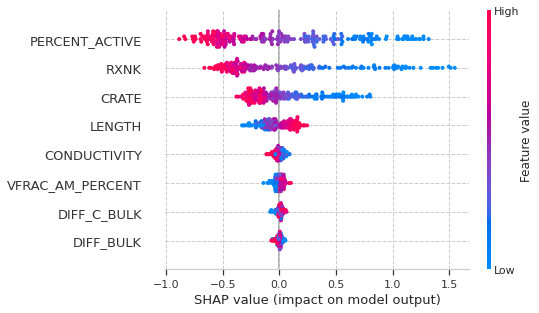

In [ ]:
shap.summary_plot(shap_values)

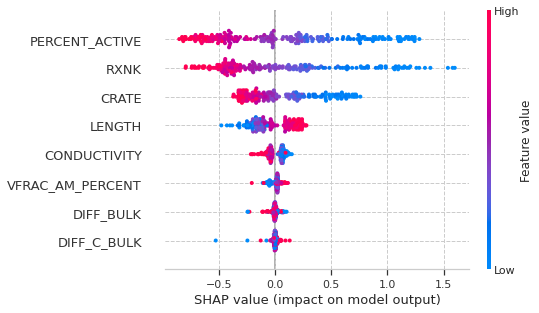

In [ ]:
explainer_1 = shap.Explainer(gbr.predict, X_test)
shap_values = explainer_1(X_test)
shap.summary_plot(shap_values)

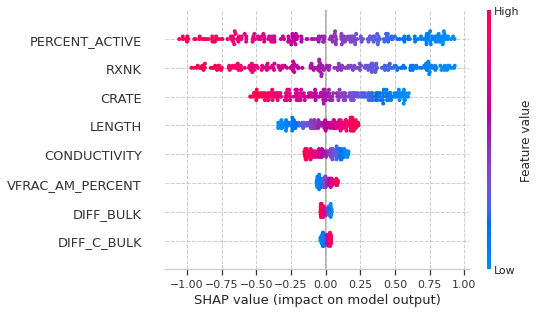

In [ ]:
explainer_2 = shap.Explainer(ridge.predict, X_test)
shap_values = explainer_2(X_test)
shap.summary_plot(shap_values)

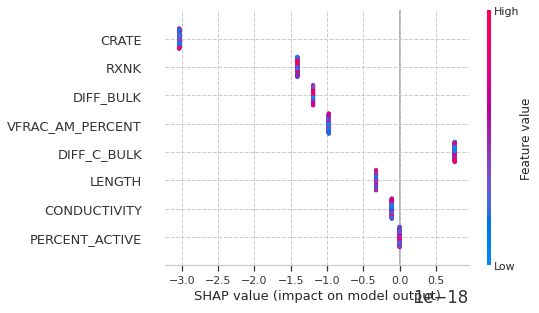

In [ ]:
explainer_3 = shap.Explainer(lasso.predict, X_test)
shap_values = explainer_3(X_test)
shap.summary_plot(shap_values)